In [1]:
try: 
    import sympy as sp
except Exception as e:
    print("Installing SymPy")
    !pip install sympy

import sympy as sp
from sympy import init_printing
import matplotlib.pyplot as plt
import numpy as np

init_printing(use_latex=True)

## Define Logistic Function

Logistic function:


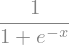

In [2]:
x = sp.symbols('x')
logistic = 1 / (1 + sp.exp(-x))

print("Logistic function:")
display(logistic)


## Compute Derivative Function


Logistic Function Derivative:


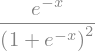

In [3]:
logistic_deriv = sp.diff(logistic, x)

print("\nLogistic Function Derivative:")
display(logistic_deriv)


## Plot Results

Text(0.5, 1.0, 'Derivative of Logistic Function')

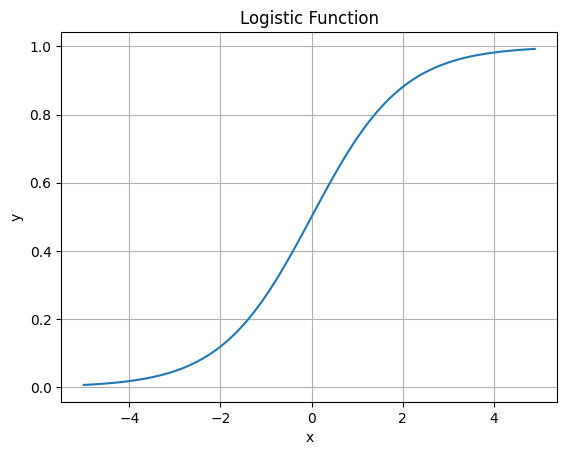

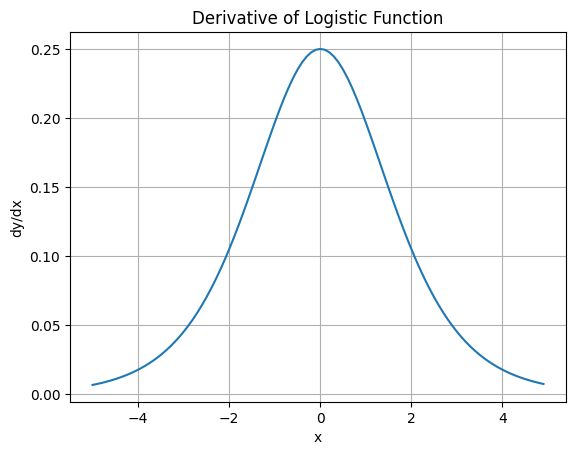

In [4]:
# Convert symbolic expression to numpy function
logistic_np      = sp.lambdify(x, logistic, modules=['numpy'])
logistic_deriv_np =  sp.lambdify(x, logistic_deriv, modules=['numpy'])

# Apply the function
x_vals = np.arange(-5,5,0.1)
y_vals = logistic_np(x_vals)
dydx_vals = logistic_deriv_np(x_vals)

plt.figure()
plt.plot(x_vals, y_vals)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logistic Function")

plt.figure()
plt.plot(x_vals, dydx_vals)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.title("Derivative of Logistic Function")

# Logistic Regression Example

## Define the probabilistic classification function

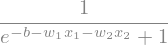

In [5]:
x = sp.Matrix(sp.symbols('x1 x2'))   # feature vector
w = sp.Matrix(sp.symbols('w1 w2'))   # weight vector
b = sp.symbols('b')                  # bias scalar

pygx = 1 / (1 + sp.exp(-(w.dot(x) + b)))

display(pygx)

## Define the nll

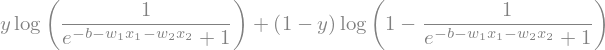

In [6]:
y = sp.symbols('y')
nll = y*sp.log(pygx) + (1-y)*sp.log(1-pygx)
display(nll)

## Get the gradient of the nll

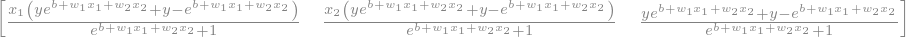

In [7]:
# Create a Matrix containing the scalar function
scalar_matrix = sp.Matrix([nll])

# Calculate the gradient using jacobian
nll_gradient = sp.simplify(scalar_matrix.jacobian((w,b)))

display(nll_gradient)

## Evaluate the nll gradient

In [8]:
grad_func = sp.lambdify((w, b, y, x), nll_gradient, modules=["numpy"])

x_val     = np.array([1,2]).T
y_val     = 1
w_val     = np.array([0.5,0.5])
b_val     = 1

print(grad_func(w_val,b_val,y_val,x_val))


[[0.07585818 0.15171636 0.07585818]]
